## Kernel SVM

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


In [2]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=0)

print(X.shape)

(100, 2)


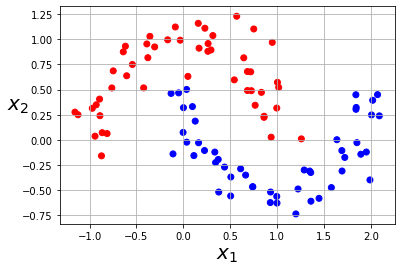

In [3]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:,0],X[:,1], c=y, cmap=cm_bright)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.savefig("make_moon.pdf", format='pdf',tight_layout=False)
plt.grid(True, which='both')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_norm = scaler.fit_transform(X)

In [5]:
x_train = dataset_norm[0:70,:]
x_test = dataset_norm[70:,:]

y_train = y[0:70]
y_test = y[70:]

In [6]:
from sklearn.svm import SVC

svk = SVC(kernel='poly', degree=3, coef0=1, C=5)
svk.fit(x_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
print(y_test)
predict = svk.predict(x_test)

print(predict)

[0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]
[0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
print(cm)

[[14  0]
 [ 0 16]]


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print("Precision: ", precision)
print("Sensibilidad: ", recall)

Precision:  1.0
Sensibilidad:  1.0


In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", markersize=12)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r.", markersize=12)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

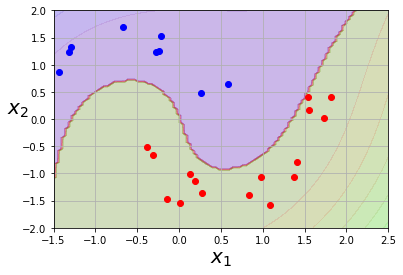

In [ ]:
plot_predictions(svk, [-1.5, 2.5, -2, 2])
plot_dataset(x_test, y_test, [-1.5, 2.5, -2, 2])

plt.savefig("svm_kernel.pdf", format='pdf')
plt.show()


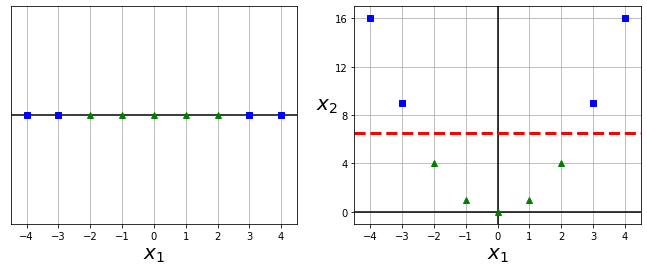

In [ ]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.savefig("higher_dimensions_plot.pdf", format='pdf', tight_layout=False)
plt.show()